In [12]:
import pandas as pd

df = pd.read_csv('data/bikes/mbajk_dataset.csv')
df.head()

,Unnamed: 0,date,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands
0,0,2023-06-25 19:07:30+00:00,25.1,45,12.4,24.7,0.0,0.0,984.3,22,8
1,1,2023-06-25 20:25:41+00:00,24.2,43,10.9,23.3,NaN,0.0,984.5,22,8
2,2,2023-06-25 20:12:20+00:00,24.2,43,10.9,23.3,0.0,0.0,984.5,22,12
3,3,2023-06-25 19:33:48+00:00,24.2,43,10.9,23.3,0.0,0.0,984.5,22,7
4,4,2023-06-25 19:55:29+00:00,24.2,43,10.9,23.3,NaN,0.0,984.5,22,8


In [13]:
df.isnull().sum()

Unnamed: 0                      0
date                            0
temperature                  1869
relative_humidity               0
dew_point                       0
apparent_temperature            0
precipitation_probability    1308
rain                         2804
surface_pressure                0
bike_stands                     0
available_bike_stands           0
dtype: int64

In [14]:
df["temperature"].fillna(df["temperature"].mean(), inplace=True)
df["rain"].fillna(df["rain"].mean(), inplace=True)
df["precipitation_probability"].fillna(df["precipitation_probability"].mean(), inplace=True)

df['day'] = pd.DatetimeIndex(df['date'], dayfirst=True).day
df['month'] = pd.DatetimeIndex(df['date'], dayfirst=True).month
df['year'] = pd.DatetimeIndex(df['date'], dayfirst=True).year
df.drop('date', axis=1, inplace=True)
df.head()

,Unnamed: 0,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands,day,month,year
0,0,25.1,45,12.4,24.7,0.000000,0.0,984.3,22,8,25,6,2023
1,1,24.2,43,10.9,23.3,20.173608,0.0,984.5,22,8,25,6,2023
2,2,24.2,43,10.9,23.3,0.000000,0.0,984.5,22,12,25,6,2023
3,3,24.2,43,10.9,23.3,0.000000,0.0,984.5,22,7,25,6,2023
4,4,24.2,43,10.9,23.3,20.173608,0.0,984.5,22,8,25,6,2023


In [15]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

X = df.drop('available_bike_stands', axis=1)
y = df['available_bike_stands']

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

models = [
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

regression_results = pd.DataFrame(columns=['model', 'MAE', 'MSE', 'explained_variance'])

for model in models:
    model_name = model.__class__.__name__
    scores = {'mae': [], 'mse': [], 'explained_variance': []}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        ev = explained_variance_score(y_test, y_pred)

        scores['mae'].append(mae)
        scores['mse'].append(mse)
        scores['explained_variance'].append(ev)

    regression_results = regression_results.append({'model': model_name,
                                                    "MAE": scores['mae'],
                                                    "MSE": scores['mse'],
                                                    "explained_variance": scores['explained_variance'],
                                                    'mean_MAE': np.mean(scores['mae']),
                                                    'mean_MSE': np.mean(scores['mse']),
                                                    'mean_explained_variance': np.mean(scores['explained_variance'])},
                                                   ignore_index=True)

regression_results.head()

/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30270/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30270/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30270/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30270/3005172868.py:25: FutureWarning: The frame.append method is deprecated and

,model,MAE,MSE,explained_variance,mean_MAE,mean_MSE,mean_explained_variance
0,BaggingRegressor,"[0.9597485958812517, 1.0351430863867346, 1.016...","[2.181259695105643, 2.464883658732281, 2.53775...","[0.9482918091762728, 0.94257299402719, 0.94183...",1.005977,2.393371,0.944024
1,RandomForestRegressor,"[0.9313586520460015, 0.9848890077560846, 0.961...","[1.99408641347954, 2.225447606311848, 2.218269...","[0.9527288458902282, 0.9481522554090624, 0.949...",0.963905,2.155754,0.949569
2,AdaBoostRegressor,"[5.224281301250956, 5.325347050671453, 5.31359...","[38.15972531404525, 39.32278907448811, 39.7082...","[0.10271237961178081, 0.10244081323791454, 0.0...",5.279340,38.886982,0.102266
3,GradientBoostingRegressor,"[4.043465070554121, 4.056673691227016, 4.12009...","[24.662434281210956, 24.99214119613461, 26.058...","[0.41536271637127553, 0.41777777038415387, 0.4...",4.080969,25.271120,0.408948


In [17]:
mae_results = {}
mse_results = {}
explained_variance_results = {}

for model in models:
    model_name = model.__class__.__name__
    mae_results[model_name] = regression_results[regression_results['model'] == model_name]['MAE'].values[0]
    mse_results[model_name] = regression_results[regression_results['model'] == model_name]['MSE'].values[0]
    explained_variance_results[model_name] = regression_results[regression_results['model'] == model_name]['explained_variance'].values[0]
    
mae_results = pd.DataFrame(mae_results)
mse_results = pd.DataFrame(mse_results)
explained_variance_results = pd.DataFrame(explained_variance_results)

mae_results = mae_results.melt(var_name='model', value_name='MAE')
mse_results = mse_results.melt(var_name='model', value_name='MSE')
explained_variance_results = explained_variance_results.melt(var_name='model', value_name='explained_variance')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

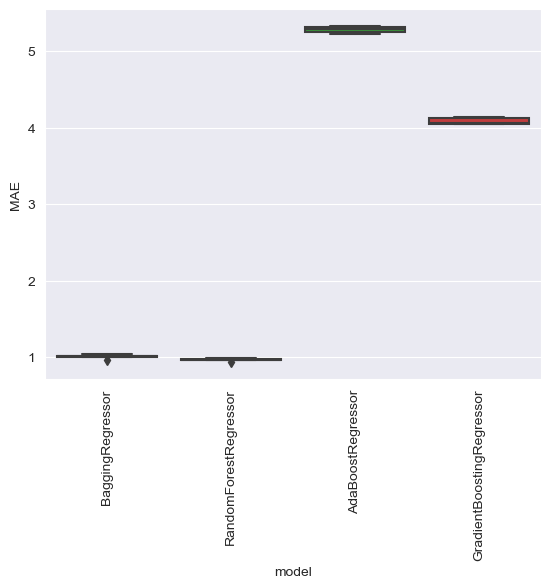

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model', y='MAE', data=mae_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

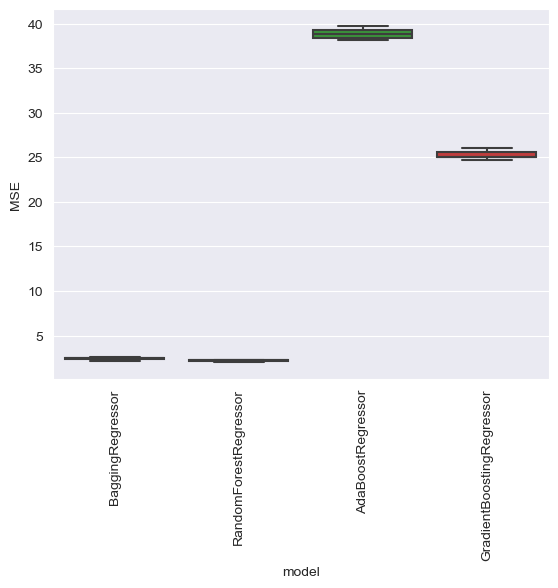

In [19]:
sns.boxplot(x='model', y='MSE', data=mse_results)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

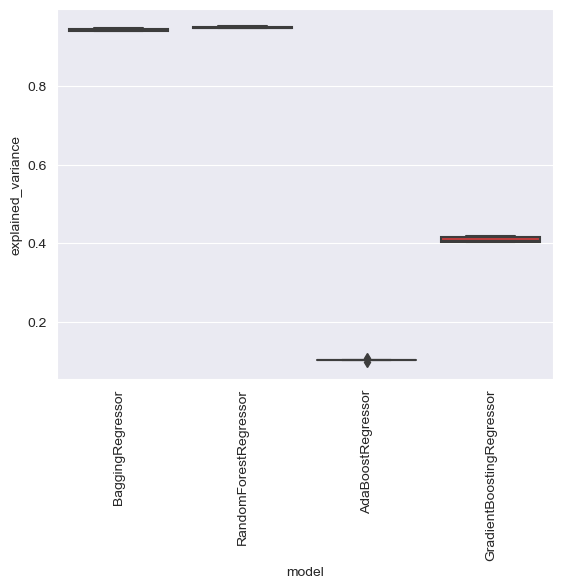

In [20]:
sns.boxplot(x='model', y='explained_variance', data=explained_variance_results)
plt.xticks(rotation=90)

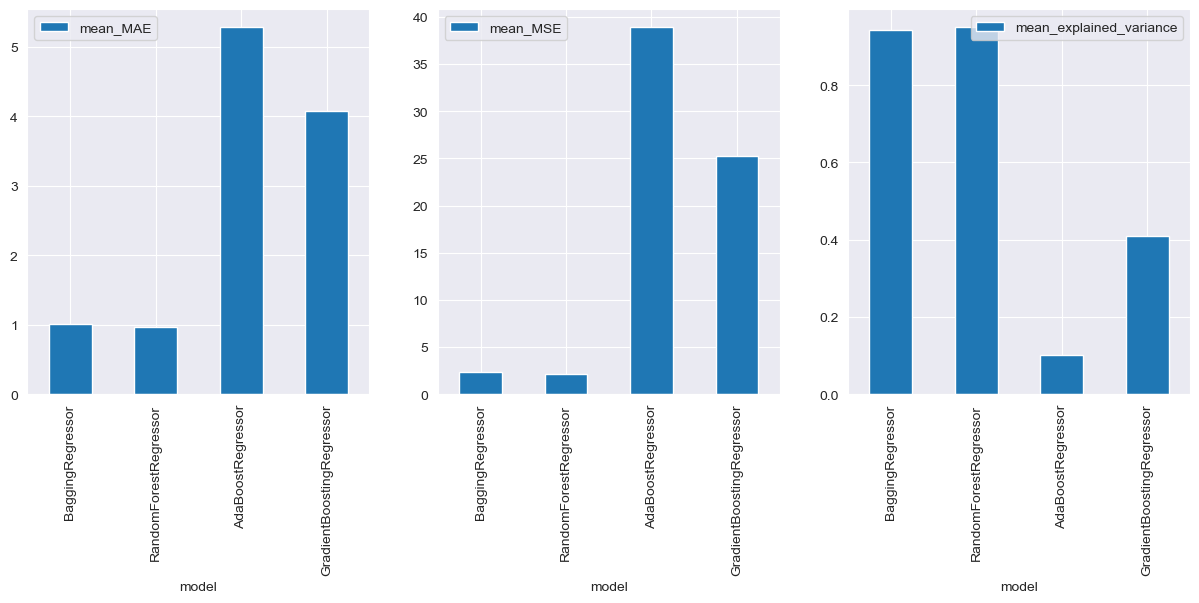

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
regression_results.plot.bar(x='model', y='mean_MAE', ax=axes[0])
regression_results.plot.bar(x='model', y='mean_MSE', ax=axes[1])
regression_results.plot.bar(x='model', y='mean_explained_variance', ax=axes[2])
plt.show()